<a href="https://colab.research.google.com/gist/RebecaSuarez22/a14e6cfa16fecba3756456d7a7816f08/practica-2-fsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practica 2: Redes Neuronales



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
import keras
from time import time
from matplotlib import pyplot as plt 
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [14]:
batch_size = 8

train_data_dir = '/content/drive/MyDrive/Radiography_Dataset/training'
validation_data_dir = '/content/drive/MyDrive/Radiography_Dataset/validator'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='categorical')



Found 400 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(264, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [6]:
epochs = 100

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4, restore_best_weights=True)

history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)

Epoch 1/100
50/50 [==============================] - 153s 2s/step - loss: 1.3798 - accuracy: 0.2901 - val_loss: 1.3270 - val_accuracy: 0.3077
Epoch 2/100
50/50 [==============================] - 9s 176ms/step - loss: 1.3603 - accuracy: 0.3041 - val_loss: 1.2612 - val_accuracy: 0.4135
Epoch 3/100
50/50 [==============================] - 9s 178ms/step - loss: 1.3164 - accuracy: 0.3537 - val_loss: 1.2126 - val_accuracy: 0.4904
Epoch 4/100
50/50 [==============================] - 9s 173ms/step - loss: 1.2489 - accuracy: 0.4858 - val_loss: 1.1762 - val_accuracy: 0.4808
Epoch 5/100
50/50 [==============================] - 9s 174ms/step - loss: 1.2164 - accuracy: 0.4314 - val_loss: 1.1666 - val_accuracy: 0.5000
Epoch 6/100
50/50 [==============================] - 9s 175ms/step - loss: 1.2059 - accuracy: 0.4823 - val_loss: 1.1325 - val_accuracy: 0.5769
Epoch 7/100
50/50 [==============================] - 9s 175ms/step - loss: 1.1890 - accuracy: 0.4966 - val_loss: 1.1293 - val_accuracy: 0.4808


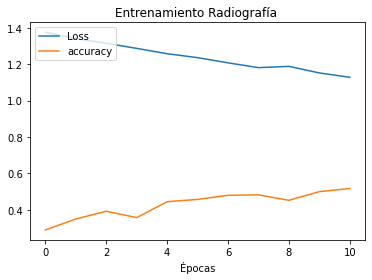

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accuracy')

plt.title('Entrenamiento Radiografía ')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

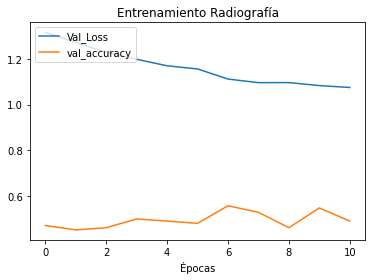

In [ ]:
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Entrenamiento Radiografía')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

In [30]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    validation_data_dir, # Put your path here
     target_size=(299, 299),
    batch_size=32,
    shuffle=False)
test_steps_per_Epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_Epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 104 images belonging to 4 classes.


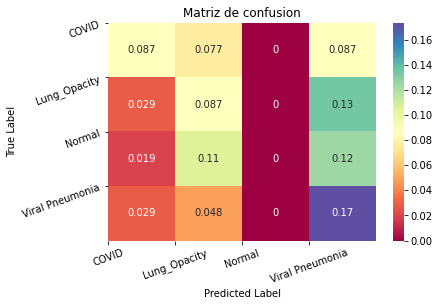

In [31]:
import seaborn as sns

test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

y_expected = validation_generator.classes
y_prediction = model.predict(validation_generator, test_steps_per_epoch)
y_prediction = np.argmax(y_prediction, axis=1)

labels = validation_generator.class_indices

cm = confusion_matrix(y_expected, y_prediction, normalize='all')
sns.heatmap(cm, annot=True, cmap="Spectral")

plt.title('Matriz de confusion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.xticks([i for i in range(0, len(labels))], labels=labels, rotation=20)
plt.yticks([i for i in range(0, len(labels))], labels=labels, rotation=20)

plt.savefig('plot_confusion_matrix.jpg', bbox_inches='tight', dpi=250)
plt.show()

In [ ]:
model.save("mimodelo.h5")

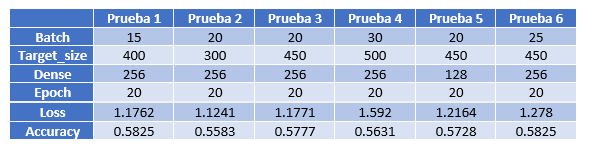